In [1]:
from P3_helpers import * 
import pandas as pd

In [2]:
df_ref = get_dataframe()
#remove 2003
df_ref = df_ref[df_ref['Year']!=2003]
df_ref.head(5)

,Source,Target,Vote,Results,Year,Date,Comment
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--
2,INeverCry,BDD,1,1.0,2013.0,2013-04-19 23:43:00,'''Support''' per noms.
3,Cncmaster,BDD,1,1.0,2013.0,2013-04-20 00:11:00,'''Support''' per noms. BDD is a strong contri...
4,Miniapolis,BDD,1,1.0,2013.0,2013-04-20 00:56:00,"'''Support''', with great pleasure. I work wit..."


In [25]:
years = df_ref['Year'].unique()
df_com = pd.DataFrame(columns = ['Year', 'Community_df'])
#loop over all files 
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    df_com.loc[len(df_com)] = [year, df_]
df_com


,Year,Community_df
0,2013.0,Source Community 0 Steel1943...
1,2012.0,Source Community 0 ...
2,2011.0,Source Community 0 ...
3,2010.0,Source Community 0 ...
4,2009.0,Source Community 0 ...
5,2008.0,Source Community 0 Acalamari ...
6,2007.0,Source Community 0 ...
7,2006.0,Source Community 0 ...
8,2004.0,Source Community 0 ...
9,2005.0,Source Community 0 ...


In [26]:
df_com_stat = compute_df_size_com(df_com,years)
df_com_stat

,Year,Nbr_of_com,Com_size,Source_prop
0,2013.0,6,"[54.0, 244.0, 111.0, 79.0, 155.0, 152.0]","[0.068, 0.307, 0.14, 0.099, 0.195, 0.191]"
1,2012.0,3,"[301.0, 355.0, 415.0]","[0.281, 0.331, 0.387]"
2,2011.0,5,"[409.0, 77.0, 391.0, 329.0, 58.0]","[0.324, 0.061, 0.309, 0.26, 0.046]"
3,2010.0,4,"[255.0, 595.0, 296.0, 447.0]","[0.16, 0.374, 0.186, 0.281]"
4,2009.0,5,"[17.0, 515.0, 736.0, 434.0, 372.0]","[0.008, 0.248, 0.355, 0.209, 0.179]"
5,2008.0,4,"[960.0, 427.0, 950.0, 365.0]","[0.355, 0.158, 0.352, 0.135]"
6,2007.0,4,"[1255.0, 730.0, 1147.0, 184.0]","[0.378, 0.22, 0.346, 0.055]"
7,2006.0,3,"[1229.0, 1230.0, 789.0]","[0.378, 0.379, 0.243]"
8,2004.0,5,"[188.0, 127.0, 22.0, 278.0, 25.0]","[0.294, 0.198, 0.034, 0.434, 0.039]"
9,2005.0,6,"[685.0, 355.0, 576.0, 15.0, 57.0, 48.0]","[0.395, 0.204, 0.332, 0.009, 0.033, 0.028]"


## FAIRE UN GRAPH QUI REGROUPE LA DISTRIBUTION DES PROPORTIONS DES SOURCES???

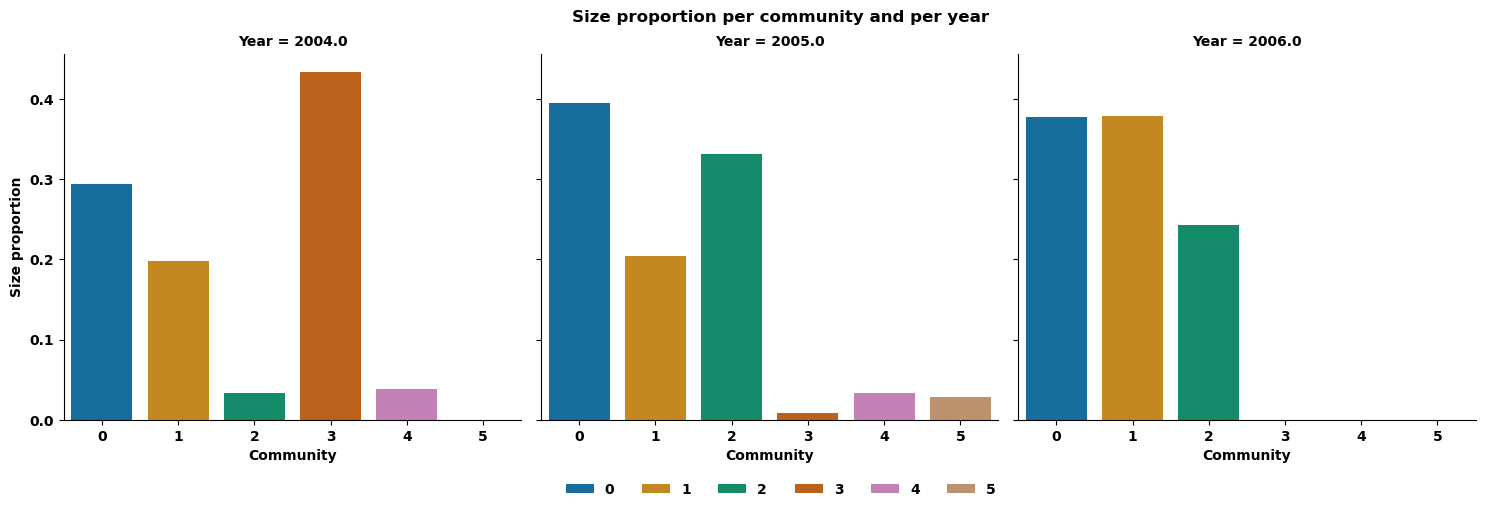

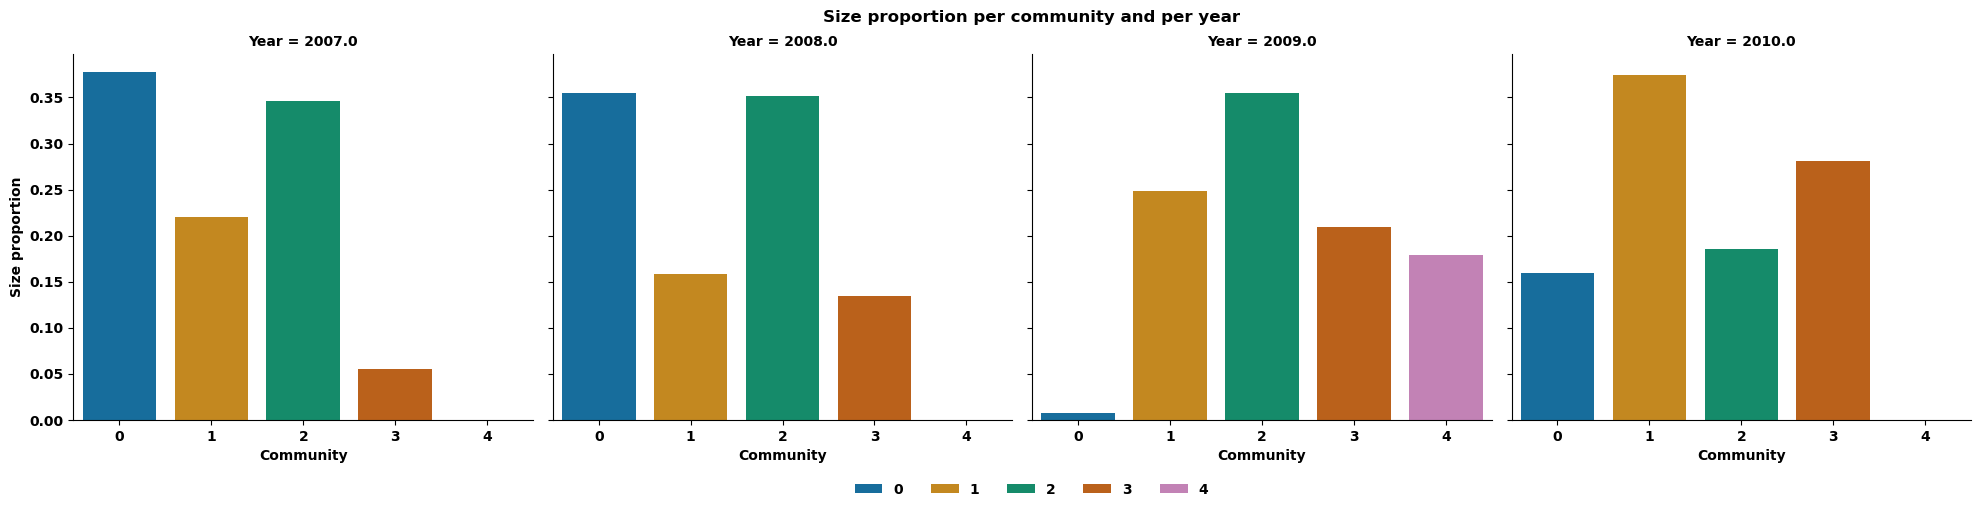

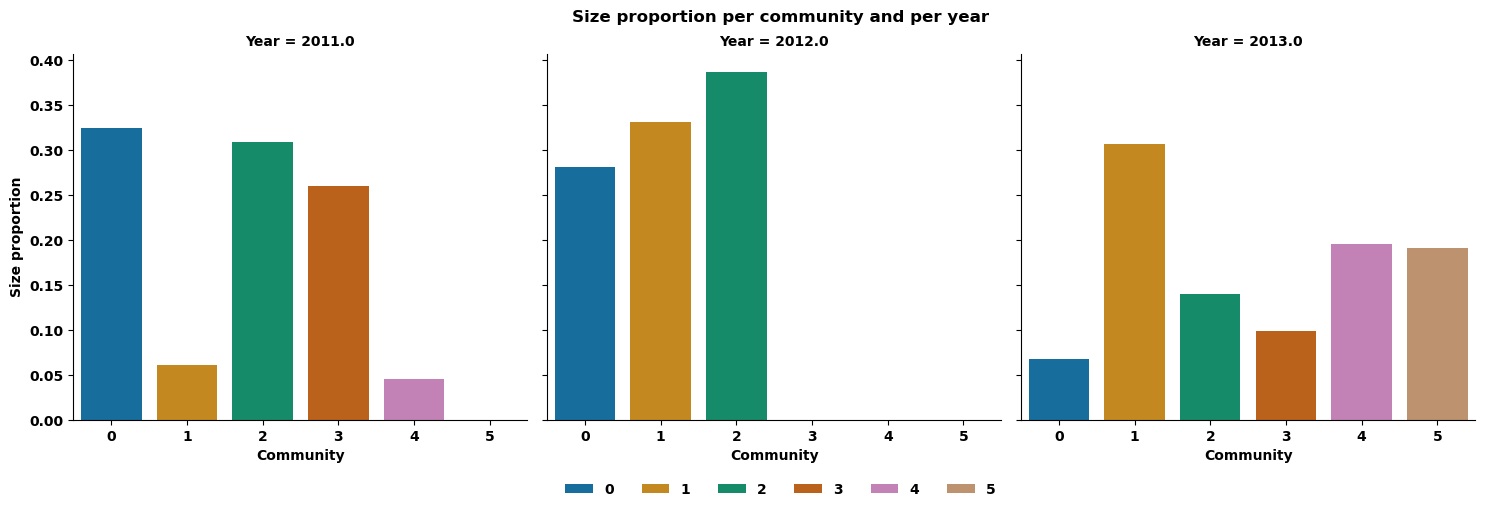

In [28]:
#transform to the df for the plot
df_prop_plot = compute_df_source_prop_for_plot(df_com_stat)
#plot for different years
plot_source_prop(df_prop_plot, [2004,2005,2006])
plot_source_prop(df_prop_plot, [2007,2008,2009,2010])
plot_source_prop(df_prop_plot, [2011,2012,2013])

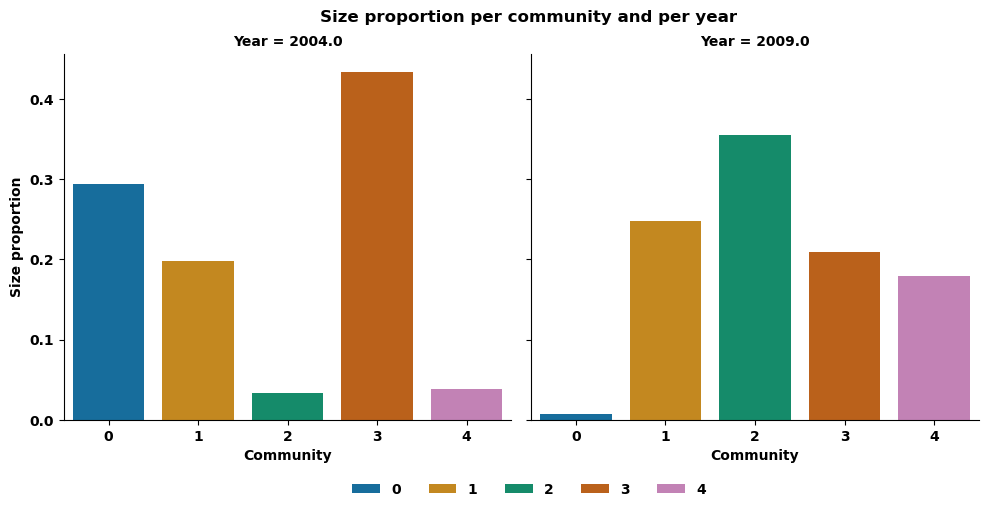

In [29]:
#figure for the website
plot_source_prop(df_prop_plot, [2004,2009])

## Type of vote

In [19]:
#Load the csv file for each year in the form of dictionnary, keys corresponding to a year, value to the corresponding df
years = df_ref['Year'].unique()
dict_com = {}
for year in years:
    path = 'Community/df_community_'+ str(int(year)) + '.csv'
    df_ = load_com_csv(path)
    dict_com[str(int(year))]=df_


In [20]:
#create the df
df_vote_type_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Pos_vote_prop', 'Neg_vote_prop', 'Neu_vote_prop'])
#loop over all years to have statistics on all of them
for year in dict_com.keys():
    df_com_year = dict_com[str(year)]
    stat_com = com_vote(df_ref, df_com_year, year)
    df_vote_type_com = pd.concat([df_vote_type_com, stat_com], ignore_index=True)
df_vote_type_com.head(5)

,Year,Com_nbr,Pos_vote_prop,Neg_vote_prop,Neu_vote_prop
0,2013,0,0.451220,0.463415,0.085366
1,2013,1,0.802198,0.133929,0.063874
2,2013,2,0.706037,0.233596,0.060367
3,2013,3,0.728448,0.211207,0.060345
4,2013,4,0.718789,0.225725,0.055485


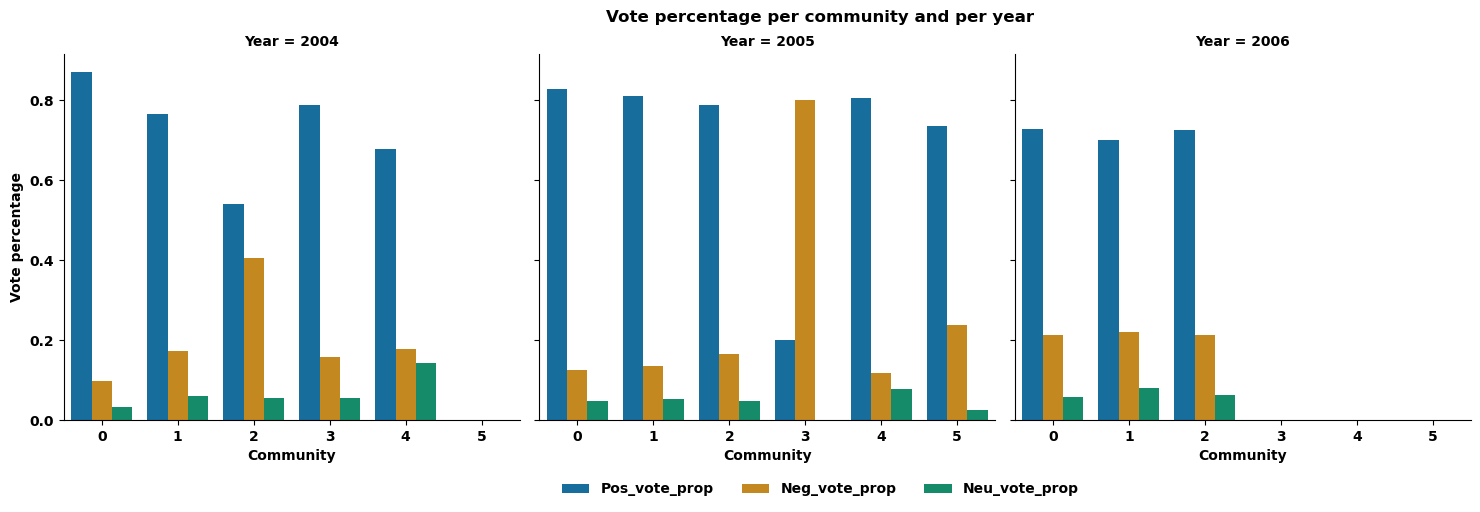

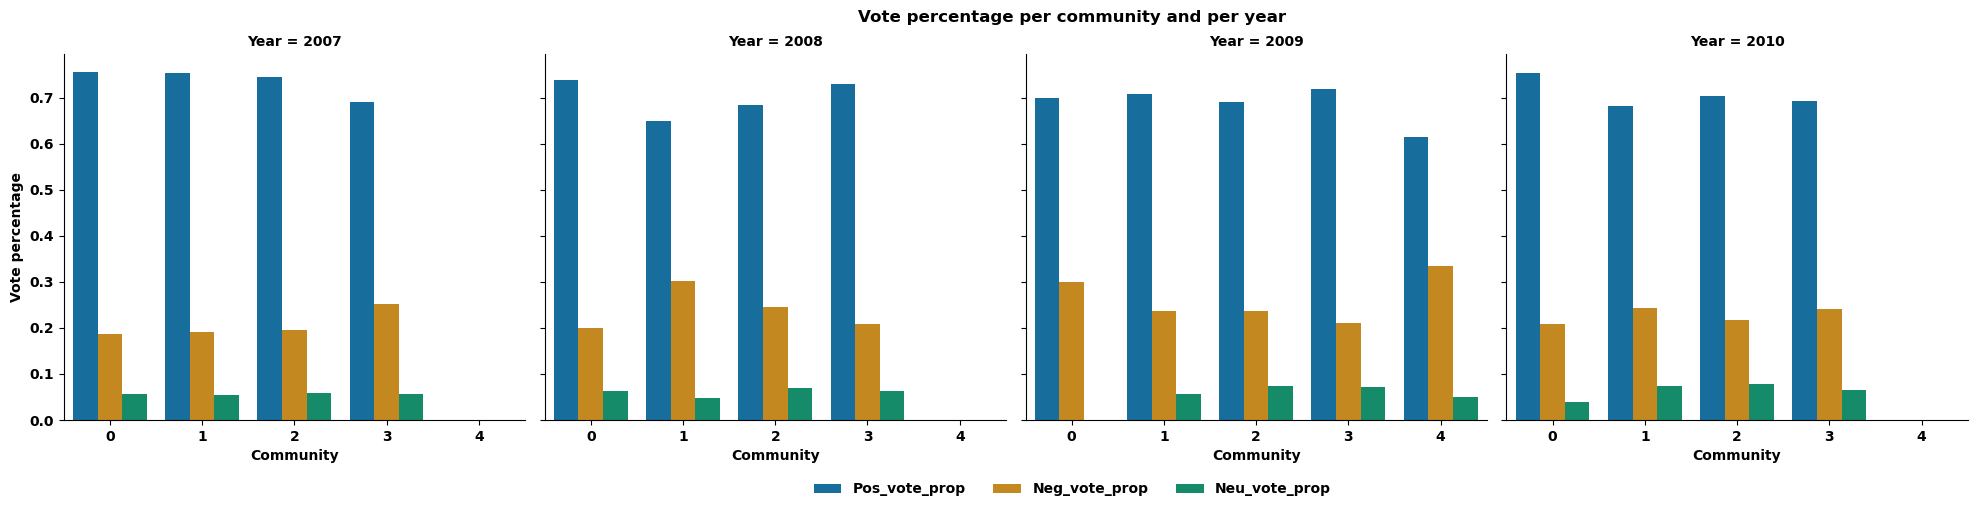

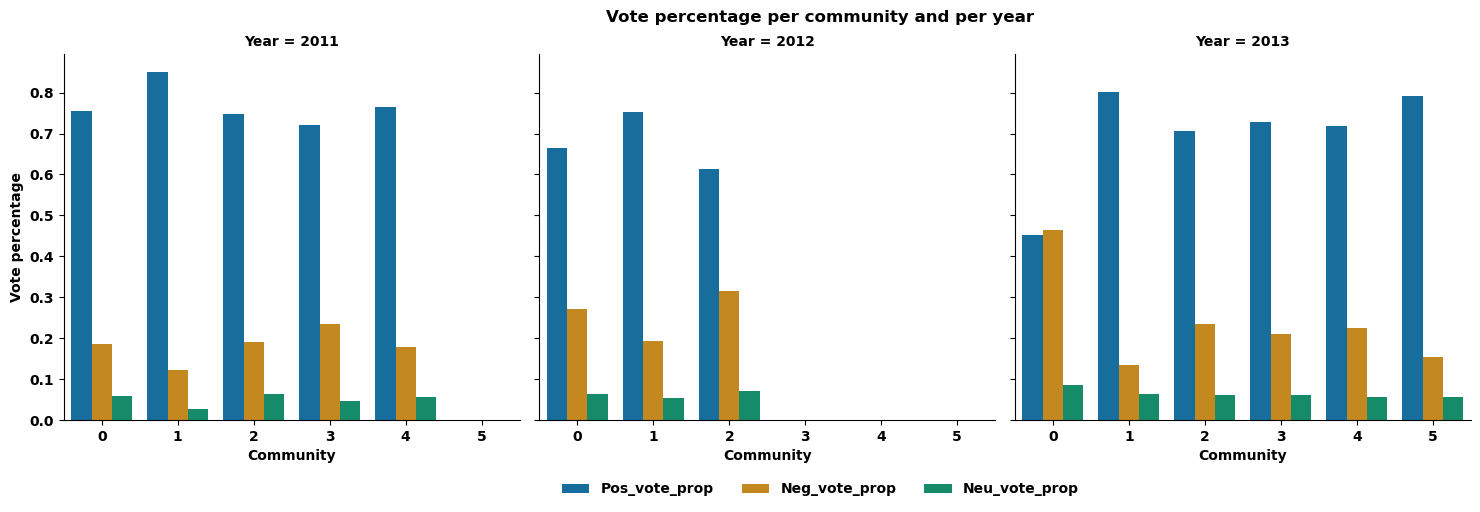

In [8]:
plot_dist_vote_per_com(df_vote_type_com, [2004,2005,2006])
plot_dist_vote_per_com(df_vote_type_com, [2007,2008,2009,2010])
plot_dist_vote_per_com(df_vote_type_com, [2011,2012,2013])

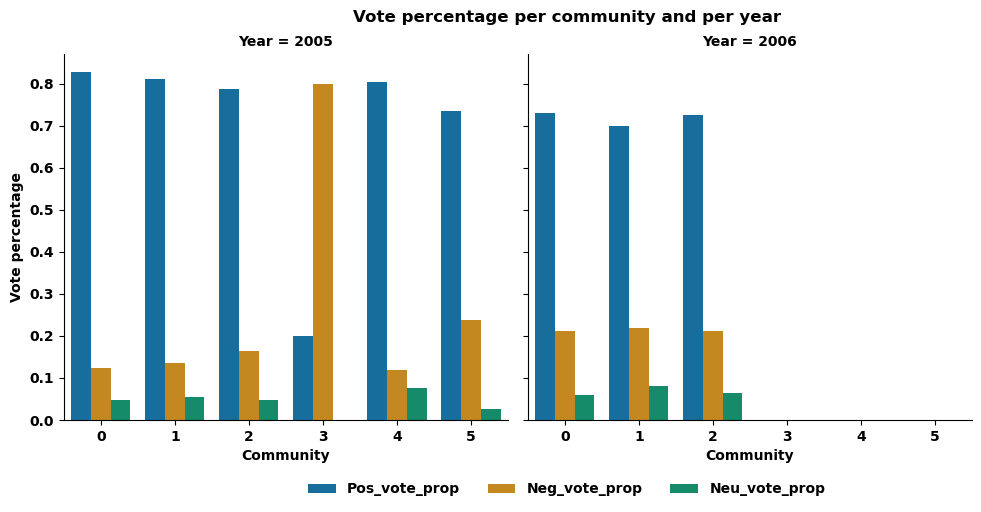

In [21]:
#generate figure for website
plot_dist_vote_per_com(df_vote_type_com, [2005,2006])

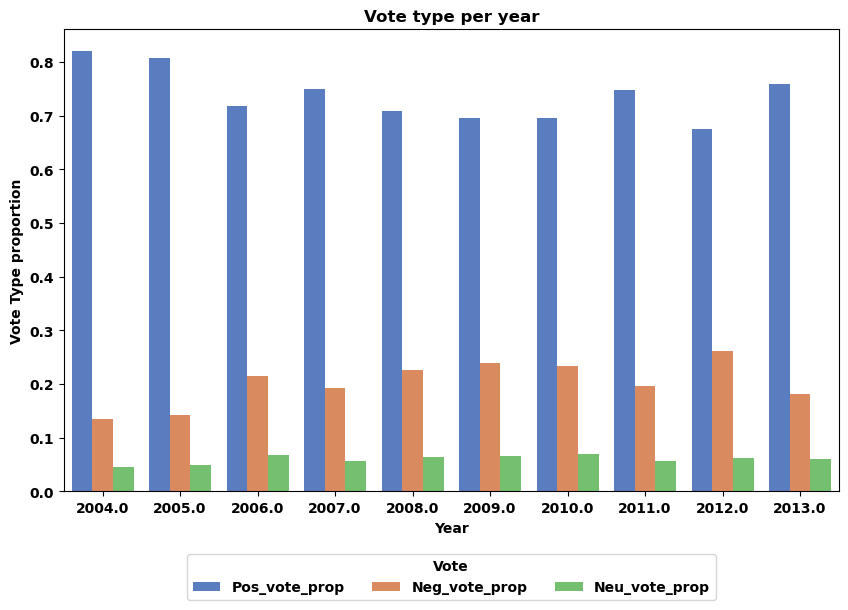

In [9]:
#compute vote type proportion per year
df_prop_vote_per_year = compute_vote_type_prop_on_whole_year(df_ref)
plot_vote_type_on_whole_year(df_prop_vote_per_year)

## Voting time

In [4]:
df = get_dataframe()
df_vote_evolution = get_timeserie_df(df)
df_vote_evolution.head(2)

,Source,Target,Vote,Results,Year,Date,Comment,Round,Voting_time,Vote_number
0,Steel1943,BDD,1,1.0,2013.0,2013-04-19 23:13:00,'''Support''' as co-nom.,1,0.00,1
1,Cuchullain,BDD,1,1.0,2013.0,2013-04-20 01:04:00,'''Support''' as nominator.--,1,1.85,6


In [5]:
#create the df
df_stat_com_voting_time = pd.DataFrame(columns=['Year', 'Com_nbr', 'Mean_voting_time', 'Median_voting_time'])
#loop on each year and compute the voting time mean and median
for year in dict_com.keys():
    if int(year)==2003: continue
    df_com_year = dict_com[str(year)]
    stat_com = com_voting_time(df_vote_evolution, df_com_year, year)
    df_stat_com_voting_time = pd.concat([df_stat_com_voting_time, stat_com], ignore_index=True)
df_stat_com_voting_time.head(5)

,Year,Com_nbr,Mean_voting_time,Median_voting_time
0,2013,0,NaN,31.241667
1,2013,1,NaN,36.683333
2,2013,2,NaN,43.691667
3,2013,3,NaN,52.133333
4,2013,4,NaN,35.833333


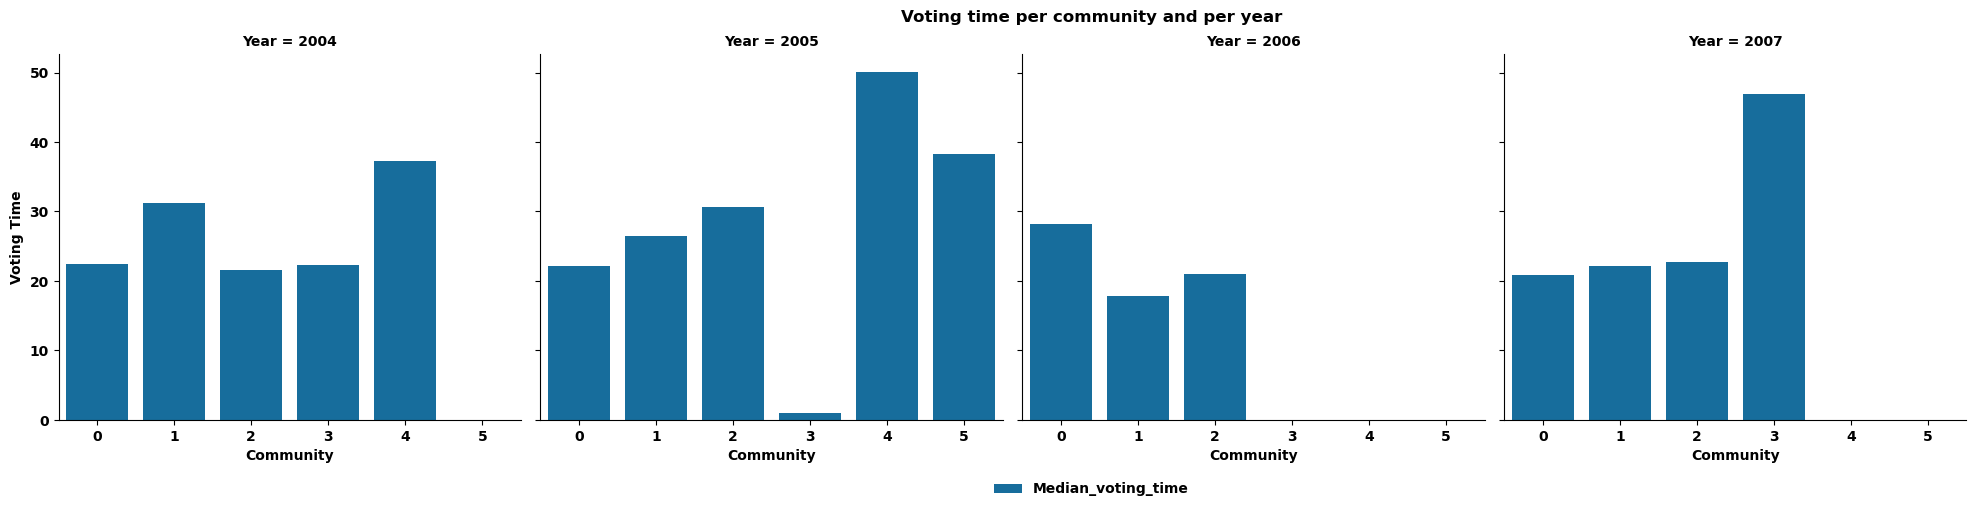

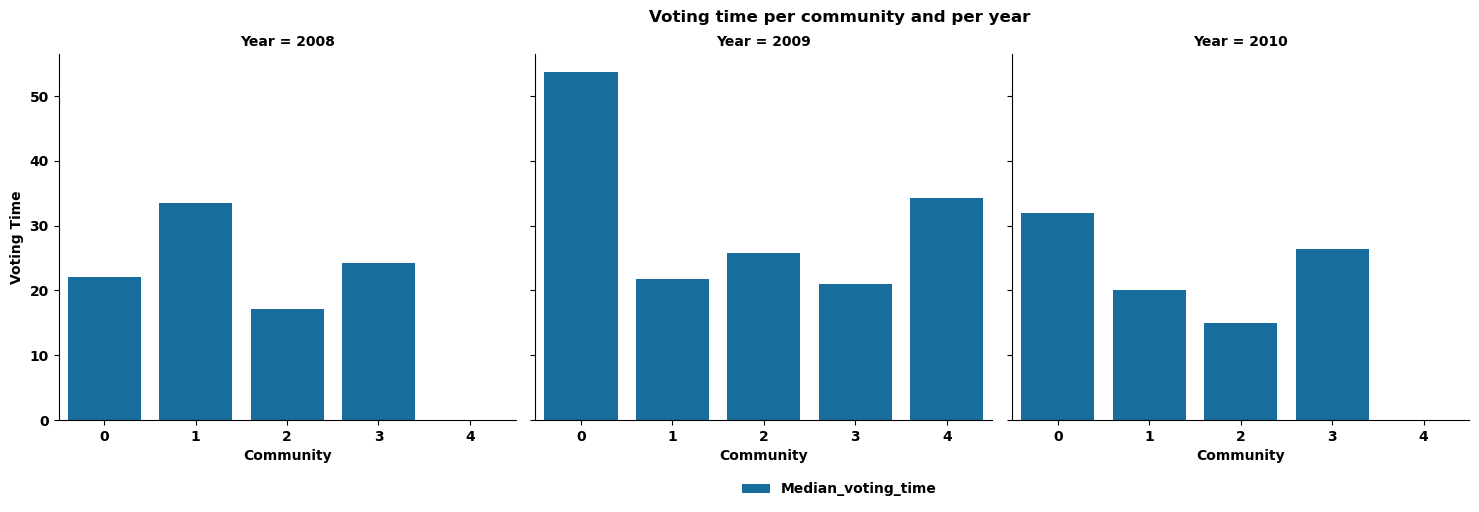

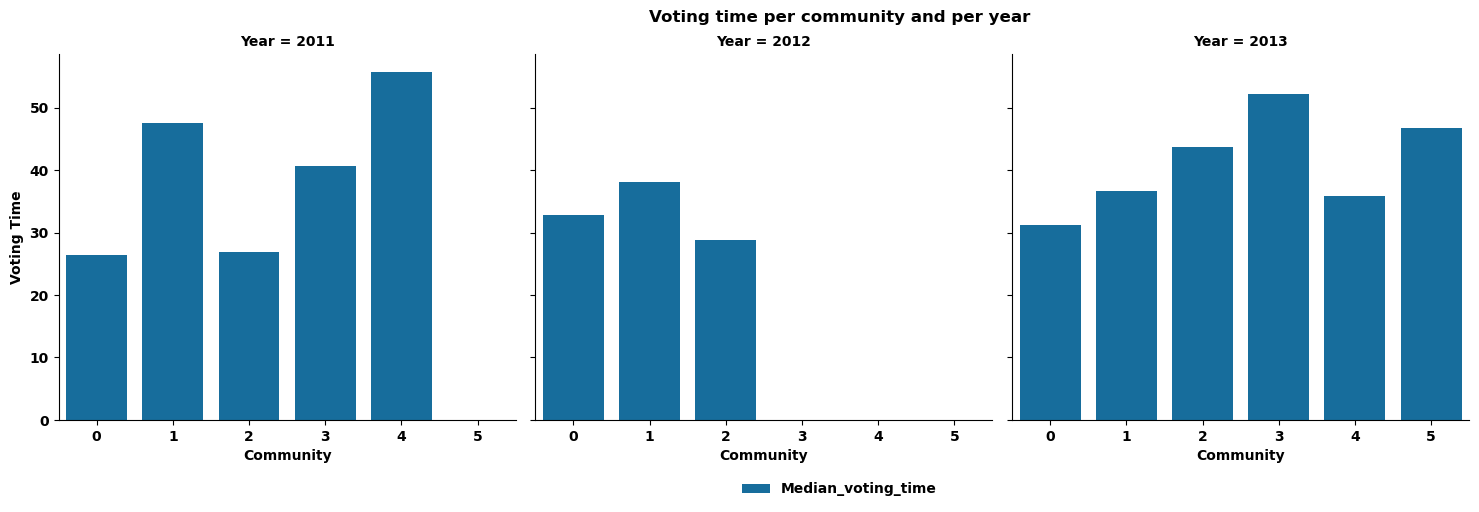

In [6]:
plot_voting_time_per_com(df_stat_com_voting_time, [2004, 2005, 2006, 2007])
plot_voting_time_per_com(df_stat_com_voting_time, [2008, 2009, 2010])
plot_voting_time_per_com(df_stat_com_voting_time, [2011, 2012, 2013])

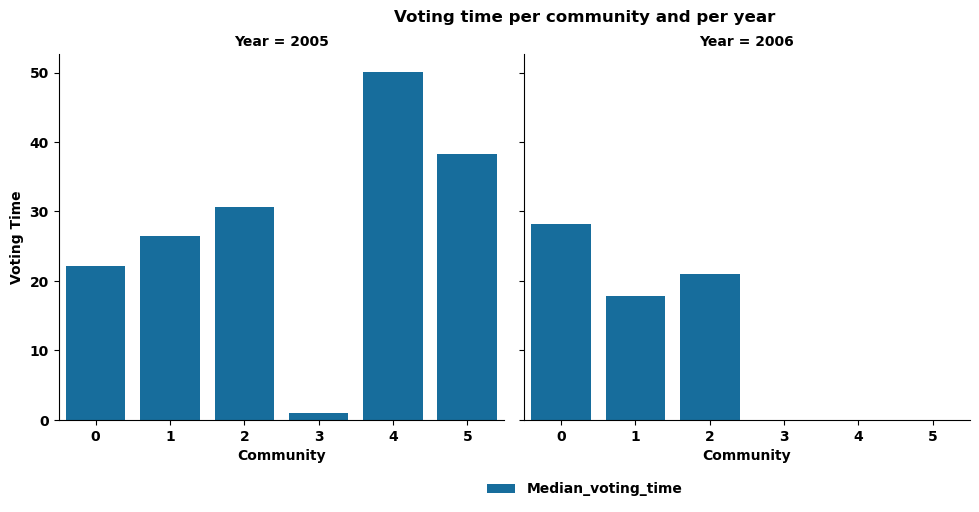

In [17]:
#Generate figure for the website
plot_voting_time_per_com(df_stat_com_voting_time, [2005, 2006])

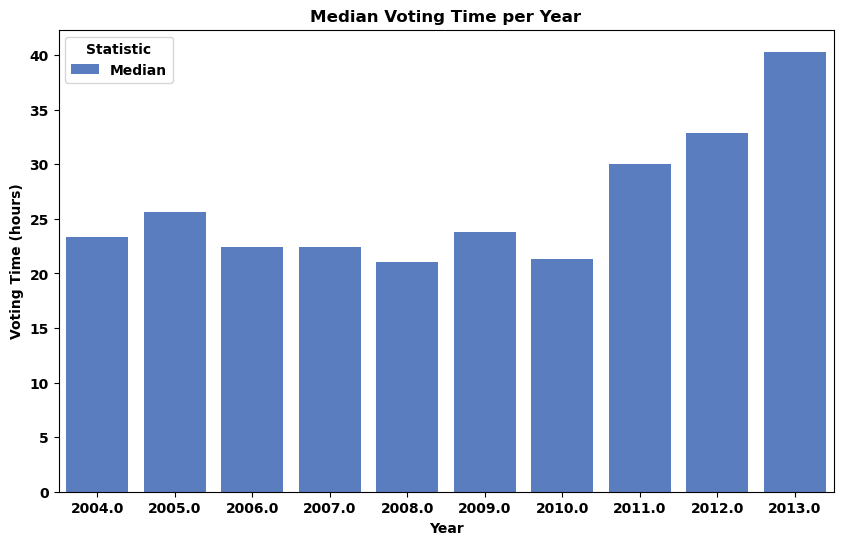

In [16]:
median_voting_time_per_year = df_vote_evolution.groupby('Year')['Voting_time'].median()
median_whole_years = pd.DataFrame(columns=['Year', 'Median'])
median_whole_years['Year'] = list(median_voting_time_per_year.index)
median_whole_years['Median'] = list(median_voting_time_per_year.values)
plot_voting_time_on_whole_year(median_whole_years)

## Does a community vote more like/predict the outcome of the vote?

More than 3/4 of the vote are positive, and most of the elections turn out to be positive. It means that if a community is always voting positively, the proportion of this community to have the same outcome as the results is higher that if a community has a more diverse vote. To assess that we need to look not only at the accuracy but also at the recall, precision and specificity

In [22]:
#create the df
df_recall_accuracy_precision_com = pd.DataFrame(columns=['Year', 'Com_nbr', 'Accuracy', 'Precision', 'Recall'])
#loop over all years to compute recall, accuracy and preicison per commuity
for year in dict_com.keys():
    df_com_year = dict_com[str(year)]
    stat_com = compute_df_recall_accuracy_precision(df_ref, df_com_year, year)
    df_recall_accuracy_precision_com = pd.concat([df_recall_accuracy_precision_com, stat_com], ignore_index=True)
df_recall_accuracy_precision_com.head(3)

,Year,Com_nbr,Accuracy,Precision,Recall,Specificity,Neutral_vote_prop
0,2013,0,0.680000,0.405405,0.882353,0.947368,0.085366
1,2013,1,0.857667,0.882705,0.947610,0.707692,0.063874
2,2013,2,0.726257,0.739777,0.876652,0.685393,0.060367


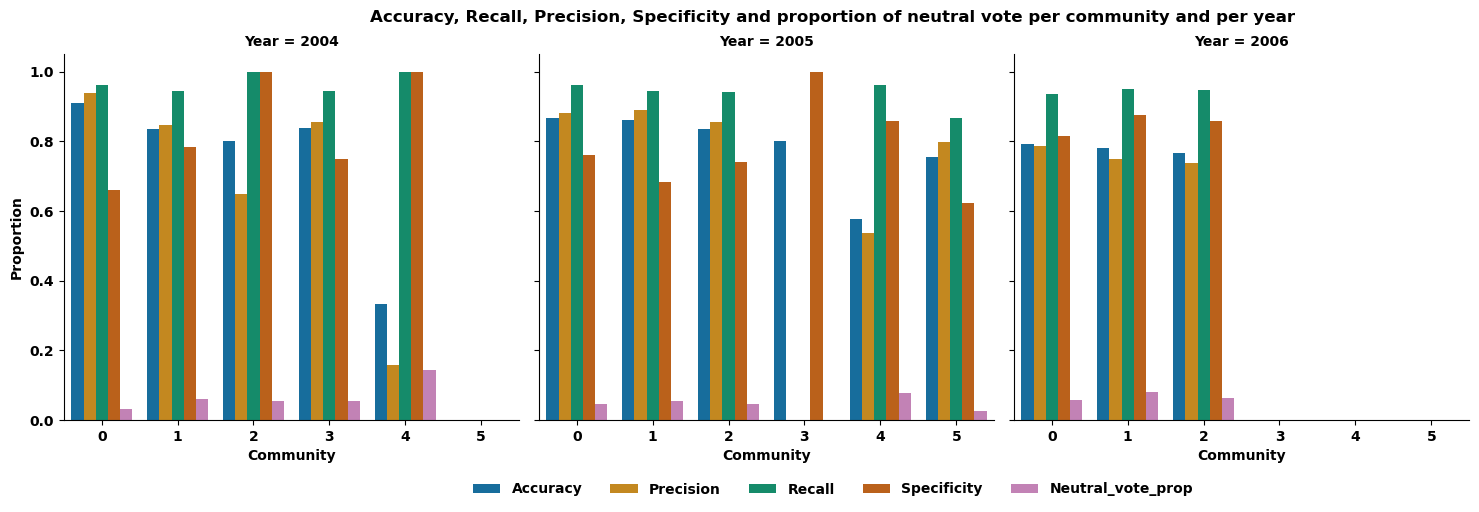

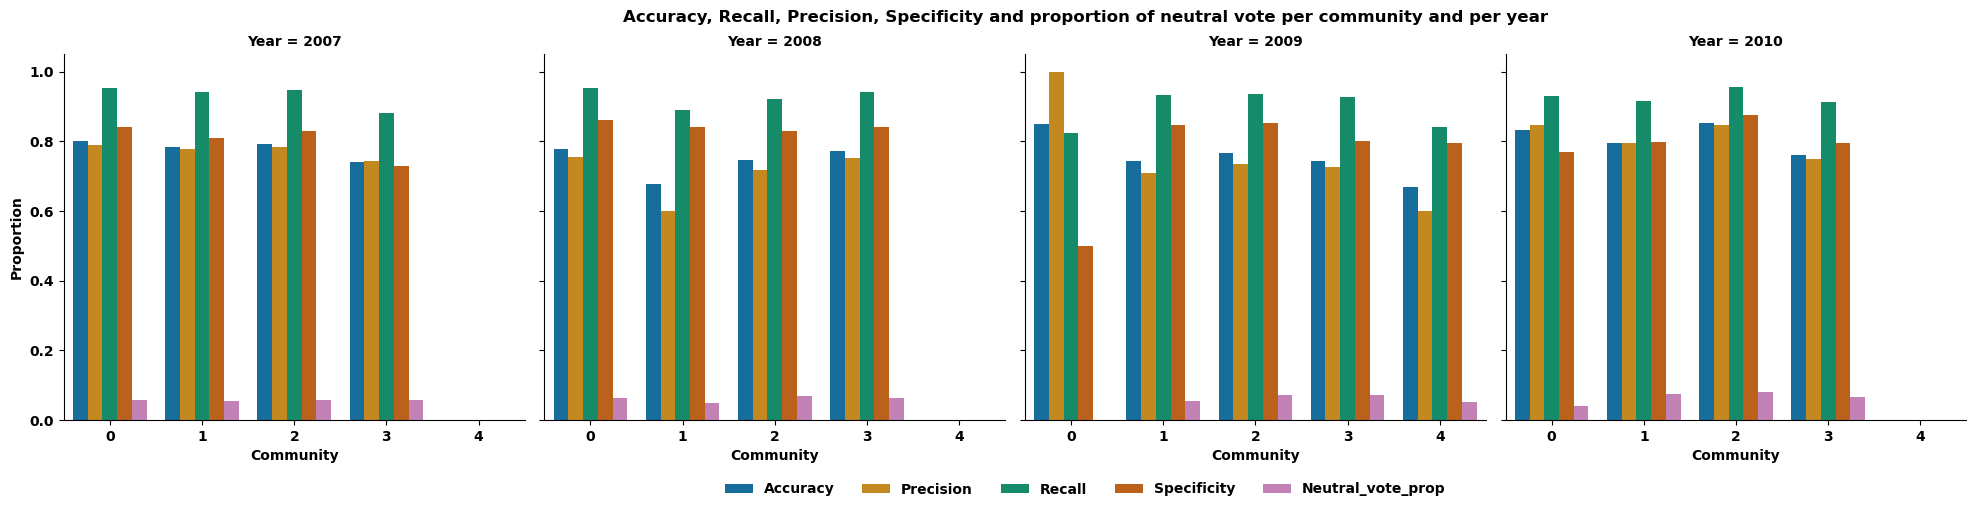

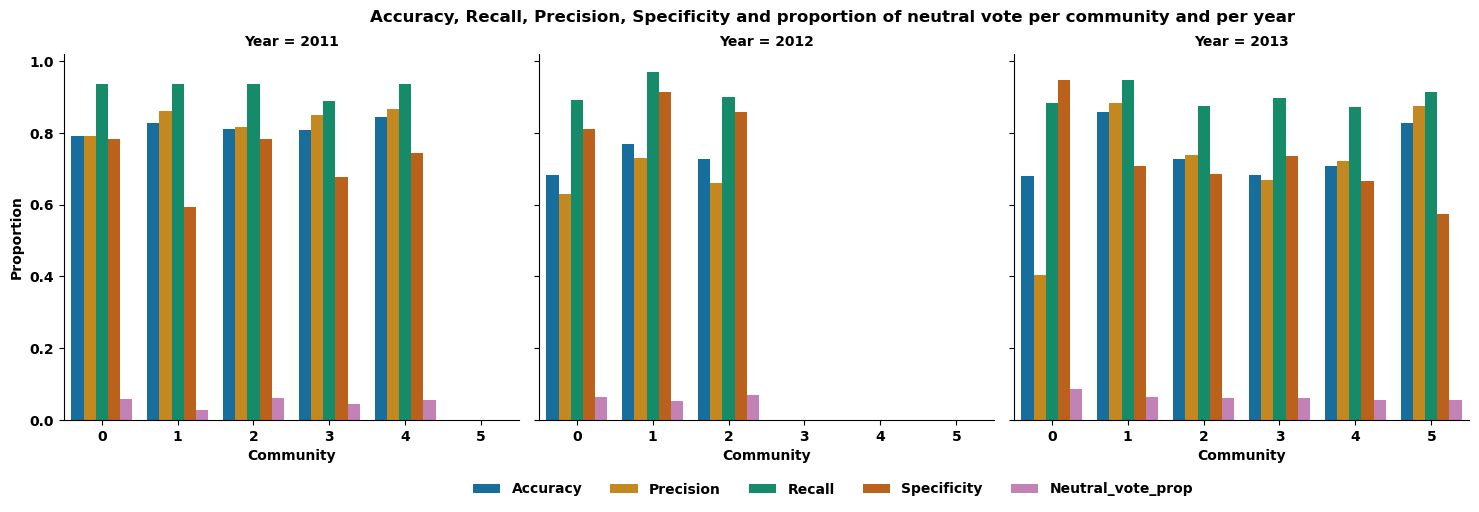

In [5]:
plot_recall_accuracy_precision_per_com(df_recall_accuracy_precision_com, [2004, 2005, 2006])
plot_recall_accuracy_precision_per_com(df_recall_accuracy_precision_com, [2007, 2008, 2009, 2010])
plot_recall_accuracy_precision_per_com(df_recall_accuracy_precision_com, [2011, 2012, 2013])

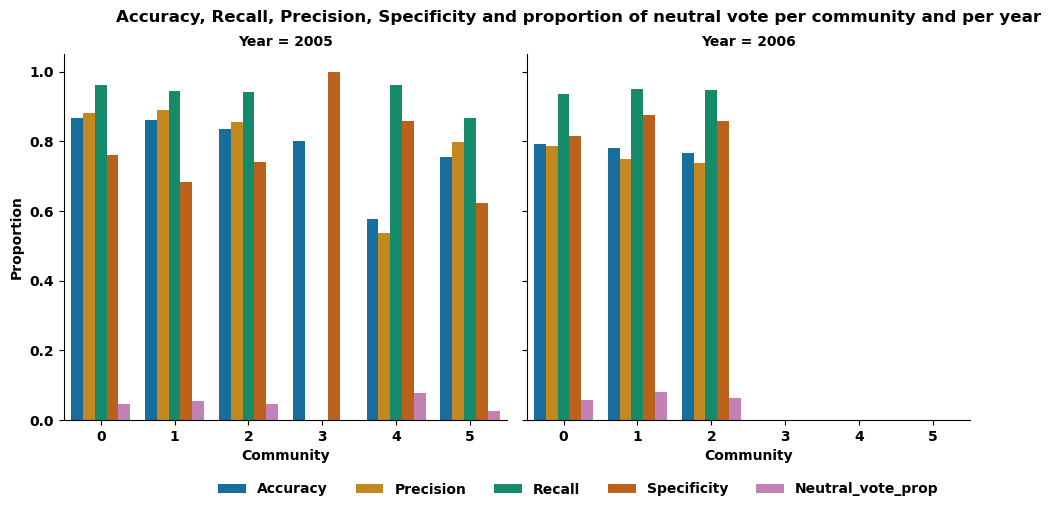

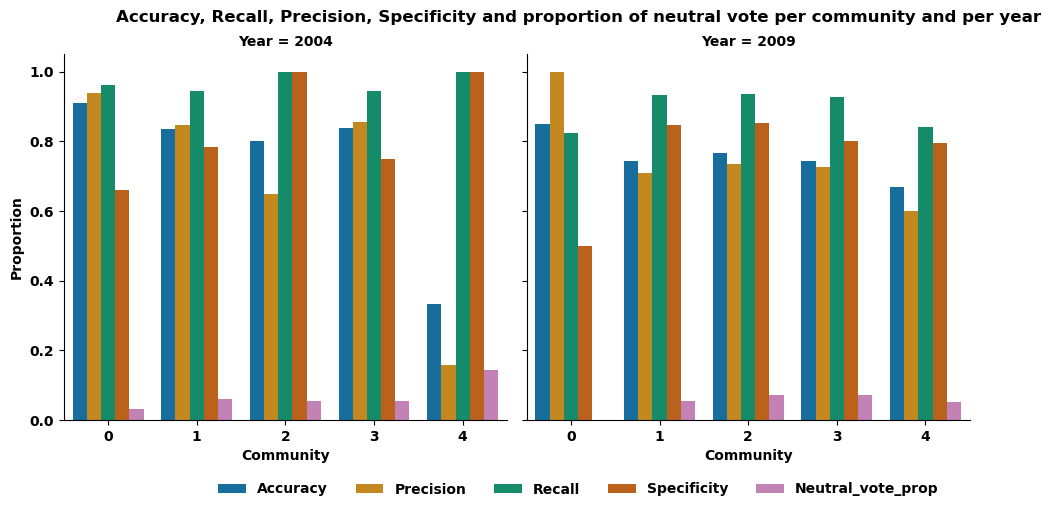

In [24]:
#generate figure for the website
plot_recall_accuracy_precision_per_com(df_recall_accuracy_precision_com, [2005, 2006])
plot_recall_accuracy_precision_per_com(df_recall_accuracy_precision_com, [2004, 2009])

In [5]:
result_by_year = df_ref.groupby('Year').apply(calculate_accuracy_recall_precision_on_whole_years).reset_index()
result_by_year.head(3)

,Year,Accuracy,Precision,Recall,Specificity,Neutral_vote_prop
0,2004.0,0.828,0.890,0.953,0.734,0.046
1,2005.0,0.810,0.872,0.949,0.737,0.048
2,2006.0,0.728,0.761,0.944,0.848,0.067


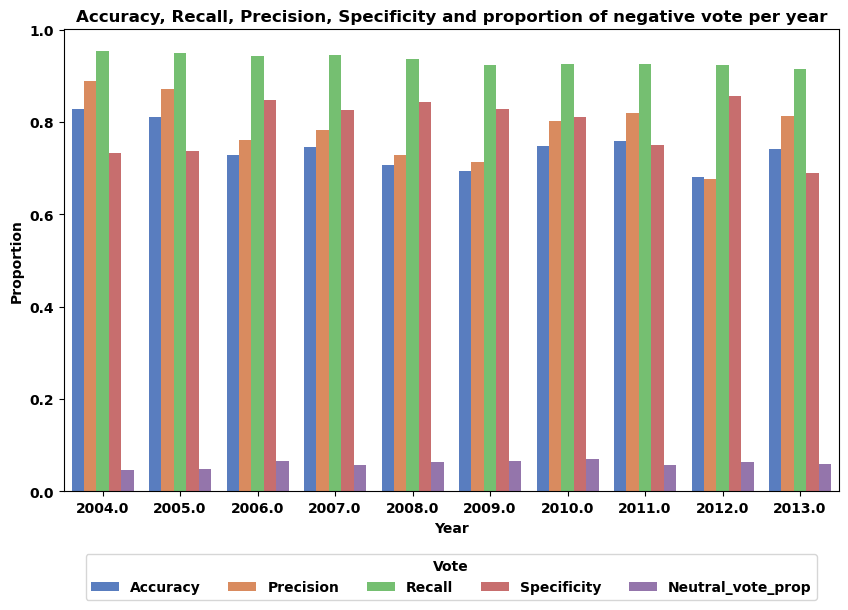

In [6]:
plot_accuracy_recall_precision_on_whole_years(result_by_year)

## Results of the election over years

OUI


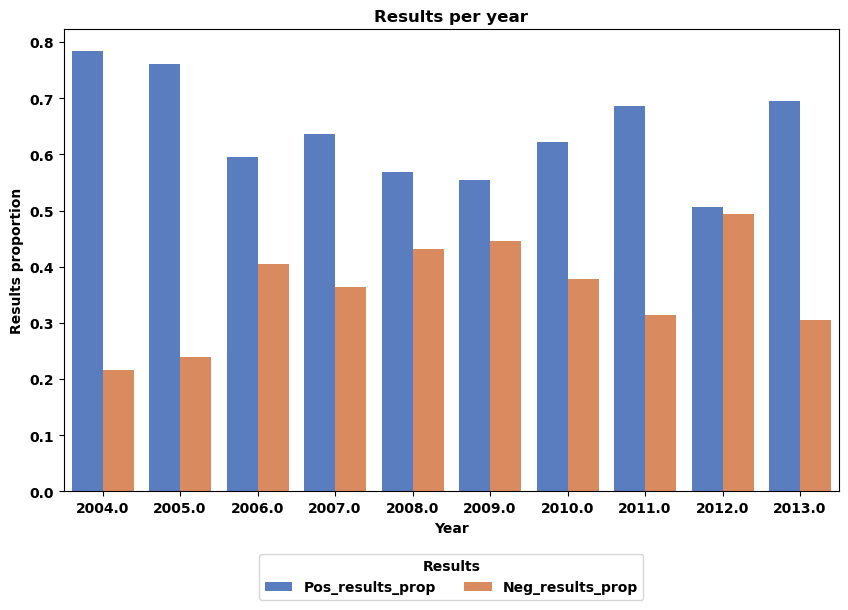

In [34]:
test = compute_results_type_prop_on_whole_year(df_ref)
plot_vote_type_on_whole_year(test, 'Results')